**Step -1 : Import data science libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step -2: Load dataset**

load that using pandas

In [3]:
dataset = pd.read_csv('./dataset/Grade_Set_1_Classification.csv')
dataset.head()

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1


*Check for missing values*

dataset.info()

In [5]:
print(dataset.keys())
print(dataset.info())

Index(['Hours_Studied', 'Result'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
Hours_Studied    9 non-null int64
Result           9 non-null int64
dtypes: int64(2)
memory usage: 224.0 bytes
None


**If possible visualize**

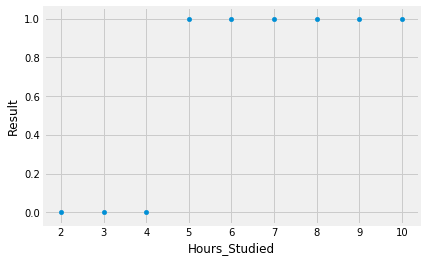

In [7]:
plt.figure(figsize=(10,6))
dataset.plot(x = 'Hours_Studied', y = 'Result', kind = 'Scatter')
plt.show()

**Method -2:**

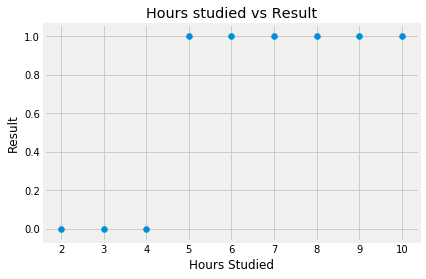

In [9]:
X = dataset.iloc[:,0:1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable
plt.scatter(X,y)
plt.xlabel('Hours Studied')
plt.ylabel('Result')
plt.title('Hours studied vs Result')
plt.show()

**Step -3: Building Machine Learning Model**

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [30]:
model_linear = LinearRegression() # Linear regression model --> Mean
model_logits = LogisticRegression(C = 10.0) # Logistic regression model --> probabitliy score

**Step -4: *Traning* **

In [31]:
model_linear.fit(X,y) # Linear regression
model_logits.fit(X,y) # Logistic regression

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred_linear = model_linear.predict(X)
y_pred_logits = model_logits.predict(X)
y_prob_logits = model_logits.predict_proba(X)

In [33]:
dataset['y_linear'] = y_pred_linear
dataset['y_logits'] = y_pred_logits

In [34]:
dataset

,Hours_Studied,Result,y_linear,y_logits
0,2,0,0.066667,0
1,3,0,0.216667,0
2,4,0,0.366667,0
3,5,1,0.516667,1
4,6,1,0.666667,1
5,7,1,0.816667,1
6,8,1,0.966667,1
7,9,1,1.116667,1
8,10,1,1.266667,1


In [35]:
y_prob_logits

array([[0.86152773, 0.13847227],
       [0.71703943, 0.28296057],
       [0.5079017 , 0.4920983 ],
       [0.29596134, 0.70403866],
       [0.14618791, 0.85381209],
       [0.06519031, 0.93480969],
       [0.02761894, 0.97238106],
       [0.01143631, 0.98856369],
       [0.00468976, 0.99531024]])

Logistic Regression probability score: [0.13847227 0.28296057 0.4920983  0.70403866 0.85381209 0.93480969
 0.97238106 0.98856369 0.99531024]


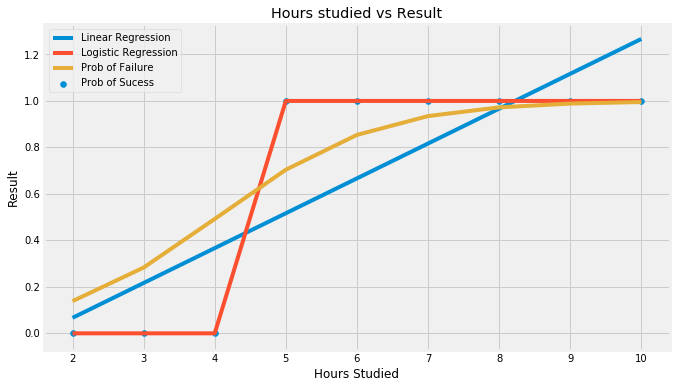

In [37]:
print('Logistic Regression probability score:', y_prob_logits[:,1])
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred_linear)
plt.plot(X,y_pred_logits)
plt.plot(X,y_prob_logits[:,1])
plt.xlabel('Hours Studied')
plt.ylabel('Result')
plt.title('Hours studied vs Result')
plt.legend(['Linear Regression','Logistic Regression','Prob of Failure','Prob of Sucess'])
plt.show()

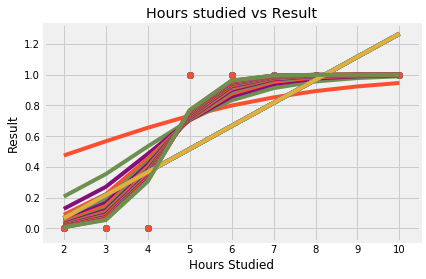

In [40]:
for i in range(1,100, 5):
    model = LogisticRegression(C = i)
    model.fit(X,y)
    y_prob = model.predict_proba(X)

    plt.scatter(X,y)
    plt.plot(X,y_pred_linear)
    plt.plot(X,y_prob[:,1])
    plt.xlabel('Hours Studied')
    plt.ylabel('Result')
    plt.title('Hours studied vs Result')

plt.show()